In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)



In [17]:
a=[1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0]
b=[0.9, 0.8,0.7,.6,.55,.54,.53,.52,.51,.505,.4,.39,.38,.37,.36,.35,.34,.33,.30,.1]

j=0
fpr=np.zeros(100)
tpr=np.zeros(100)

for th in np.arange(0.01,1,0.01):
    fp=0.
    tp=0.
    tn=0.
    fn=0.
    i=0
    for c in b:
        if (c>= th)& (a[i]==1):
            tp+=1
            i+=0
        if (c< th)& (a[i]==1):
            fn+=1
            i+=0
        if (c>= th)& (a[i]==0):
            fp+=1
            i+=0
        if (c< th)& (a[i]==0):
            tn+=1
            i+=0
    #print tn
    if fp ==0:
        fpr[j]=0
        j+=1
        continue
    fpr[j]=fp/(fp+tn)
    tpr[j]=tp/(tp+tn)
    j+=1

    

In [19]:
b

[0.9,
 0.8,
 0.7,
 0.6,
 0.55,
 0.54,
 0.53,
 0.52,
 0.51,
 0.505,
 0.4,
 0.39,
 0.38,
 0.37,
 0.36,
 0.35,
 0.34,
 0.33,
 0.3,
 0.1]

<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса</center></h2>

## Quiz Time!

# Деревья решений

## Пример 1

* Некоторая кoмпания открыла курс по разработке приложений на Andriod для (всех) студентов МГУ
* Прошло уже несколько наборов
* По результатам каждого отбора слушатели отставляют отзыв (`+1`|`-1`)
* О слушателях известно
    * Пол
    * Возраст
    * Курс
    * Факультет
    * Посещаемость
    * Оценки за ДЗ
    * ...
    
Компания просит у исследователя описать те группы слушателей, которым курс не понравился, чтобы возможно как-то его улучшить.

В идеальном мире исследователь должен прийти с чем-то вроде

* `[Пол = Ж][Возраст > 21][Факультет = Экономика][Посещаемость < 50%]`  - не нравится в 82% случаев
* `[Пол = М][Возраст >= 20][Факультет = ВМК][Средний балл > 4.5]` - не нравится в 10% случаев
* ...


## Пример 2

* Вы приходите в банк за кредитом ~~не дай бог~~, подаете анкету со всеми необходимыми документами
* Сотрудник банка проверяет вашу анкету:
    1. Если объем сбережений <= 200 тыс., то перейти к шагу 2, иначе - к шагу 3.
    2. Если стаж больше года - дать кредит, иначе - не давать
    3. Если продолжительность займа < 30 месяцев - не давать кредит, иначе - к шагу 4
    4. ...

<center><img src='https://www.mapr.com/sites/default/files/blogimages/creditdecisiontree.png'><center/>

<center><img src='https://i.stack.imgur.com/KYSy4.png'></center>

<center><img src='https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAZ5AAAAJGU4MGQyYzM2LTY2ZjgtNGYzYi04NWEyLTVkZGU3ODUxNjljNw.png'></center>

<center><img src='https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg'><center/>

<center><img src='http://scikit-learn.org/stable/_static/ml_map.png'><center/>

<center><img src='https://eight2late.files.wordpress.com/2016/02/7214525854_733237dd83_z1.jpg?w=700'><center/>

Формально, дерево решений - это связный ациклический граф. В нем можно выделить 3 типа вершин:
1. Корневая вершина (root node) -  откуда все начинается
2. Внутренние вершины (intermediate nodes)
3. Листья (leafs) - самые глубокие вершины дерева, в которых содержится "ответ"

Во внутренней или коневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся все глубже

## Обобщенный псевдокод алгоритма построения дерева


```{python}
1. function decision_tree(X, y):

2.    if stopping_criterion(X, y) == True:
    
3.        S = create_leaf_with_prediction(y)
        
4.    else:
    
5.        S = create_node()
6.        (X_1, y_1) .. (X_L, y_L) = best_split(X, y)
        
7.        for i in 1..L:
8.            C = decision_tree(X_i, y_i)
9.            connect_nodes(S, C)
10.   return S     
```

## Как определяются лучшие разбиения (best splits)?
### Меры неопределенности (impurity measures)

По какому мешку лучше классифицировать?

<center><img src='images/bins.png'></center>


## Как определяются лучшие разбиения (best splits)?
### Меры неопределенности (impurity measures)

Пусть $p_k$ - это доля класса $C_k$ в узле дерева $S$.

1. Missclassification error  
$$I(S) = 1 - \max\limits_k p_k $$
2. Gini index 
$$I(S) = 1 - \sum\limits_k (p_k)^2 = \sum\limits_{k'\neq k} p_{k'} p_k$$
3. Entropy 
$$I(S) = -\sum\limits_k p_k \log(p_k)$$


In [23]:
def plot_impurities():
    p = np.linspace(0, 1, 100)
    #print p
    p = np.c_[p, 1-p]
    print p

    missclass = 1 - p.max(axis=1)
    plt.plot(p[:,0], missclass, label = 'missclassification error')

    gini =  (p ** 2)
    print gini
    plt.plot(p[:,0], gini, label = 'gini index')
    
    entropy = - np.nansum((p*np.log2(p)), axis=1)
    plt.plot(p[:,0], entropy, label = 'entropy')

    plt.xlabel('$p_k$')
    plt.ylabel('$I(S)$')
    # plt.legend(loc=2, bbox_to_anchor=(0.,0.))
    plt.legend(loc=2, bbox_to_anchor=(-0.3,1))
    
    plt.show()

[[0.         1.        ]
 [0.01010101 0.98989899]
 [0.02020202 0.97979798]
 [0.03030303 0.96969697]
 [0.04040404 0.95959596]
 [0.05050505 0.94949495]
 [0.06060606 0.93939394]
 [0.07070707 0.92929293]
 [0.08080808 0.91919192]
 [0.09090909 0.90909091]
 [0.1010101  0.8989899 ]
 [0.11111111 0.88888889]
 [0.12121212 0.87878788]
 [0.13131313 0.86868687]
 [0.14141414 0.85858586]
 [0.15151515 0.84848485]
 [0.16161616 0.83838384]
 [0.17171717 0.82828283]
 [0.18181818 0.81818182]
 [0.19191919 0.80808081]
 [0.2020202  0.7979798 ]
 [0.21212121 0.78787879]
 [0.22222222 0.77777778]
 [0.23232323 0.76767677]
 [0.24242424 0.75757576]
 [0.25252525 0.74747475]
 [0.26262626 0.73737374]
 [0.27272727 0.72727273]
 [0.28282828 0.71717172]
 [0.29292929 0.70707071]
 [0.3030303  0.6969697 ]
 [0.31313131 0.68686869]
 [0.32323232 0.67676768]
 [0.33333333 0.66666667]
 [0.34343434 0.65656566]
 [0.35353535 0.64646465]
 [0.36363636 0.63636364]
 [0.37373737 0.62626263]
 [0.38383838 0.61616162]
 [0.39393939 0.60606061]


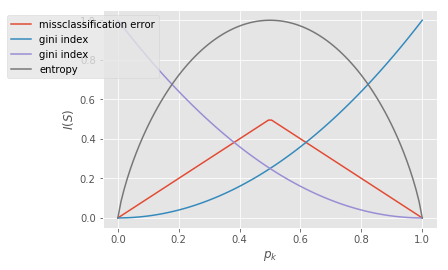

In [24]:
plot_impurities()

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

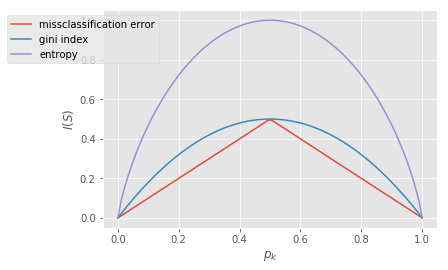

In [9]:
plot_impurities()

## Как определяются лучшие разбиения (best splits)?
### Прирост информации

Выберем признак $A$ и пороговое значение $t$ на нем таким образом, чтобы уменьшить неопределенность:

**Насколько уменьшится неопределенность:** <br/>
$$ Gain(S, A) = I(S) - \left(\frac{|S_L|}{|S|}\cdot I(S_L) + \frac{|S_R|}{|S|}\cdot I(S_R) \right),$$ где $S_R$ и $S_L$ - это потомки узла $S$ c объектами, удовлетворяющим соответствующим условиям.

* Стратегия выбора - жадная
* Как определяется порог при вещественных признаках?
* Локальная оптимизация - уменьшение Impurity внутри узла
* Результаты не сильно зависят от выбора самой меры неопределенности


In [4]:
def wine_demo():

    df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

    fig, ax = plt.subplots(1, 2)

    fig.set_figheight(5)

    df_wine.loc[:, 'quality_cat'] = (df_wine.loc[:, 'quality'] > 5).astype(int) 
    idx = df_wine.loc[:, 'quality_cat'] == 1
    df_wine.loc[idx, 'alcohol'].hist(label='good quality', bins=20, alpha = 0.4, ax=ax[0])
    df_wine.loc[~idx, 'alcohol'].hist(label='bad quality', bins=20, alpha = 0.4, ax=ax[0])
    ax[0].set_xlabel('alcohol')

    p = np.array([df_wine.quality_cat.mean(), 1-df_wine.quality_cat.mean()])

    init_impurity = impurity(p)

    G = []
    t_range = np.linspace(df_wine.alcohol.min(), df_wine.alcohol.max(), 100)

    for t in t_range:
        idx = df_wine.alcohol < t
        p1 = np.array([df_wine.loc[idx, 'quality_cat'].mean(), 1-df_wine.loc[idx, 'quality_cat'].mean()])
        p2 = np.array([df_wine.loc[~idx, 'quality_cat'].mean(), 1-df_wine.loc[~idx, 'quality_cat'].mean()])

        G.append(init_impurity - (idx.mean()*impurity(p1) + (1-idx.mean())*impurity(p2)))

    ax[1].plot(t_range, G)
    ax[1].set_xlabel('alcohol')
    ax[1].set_ylabel('Gain')

    mG = np.nanmax(G)
    mt = t_range[np.nanargmax(G)]

    ax[0].vlines(mt, 0, 150, label='best threshold (%.2f)' % mt)
    ax[1].vlines(mt, 0, mG, label='best threshold\n(gain = %.4f)' % mG)
    
    ax[0].legend()
    ax[1].legend()
    
    plt.show()

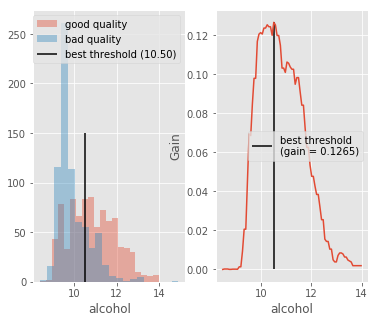

In [5]:
def impurity(p): 
    # p - массив из долей каждого из классов
    # Имплементируйте любую меру неопределенности
    return 1 - (p**2).sum()
#     return 1 - np.max(p)
#     return -np.sum(p*np.log2(p))
wine_demo() 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess


def demo_dec_tree(depth=1):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(5)

    np.random.seed(0)

    C = np.array([[0., -0.7], [1.5, 0.7]])
    gauss1 = np.dot(np.random.randn(200, 2) + np.array([4, 2]), C)
    gauss2 = np.dot(np.random.randn(300, 2), C)

    X = np.vstack([gauss1, gauss2])
    y = np.r_[np.ones(200), np.zeros(300)]

    ax[1].scatter(X[:,0], X[:, 1], c=y)
    ax[1].set_xlabel('$x_1$')
    ax[1].set_ylabel('$x_2$')

    # Dec Tree Stuff
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=123)
    tree.fit(X,y)

    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)

    Y = tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    ax[1].contourf(xx1, xx2, Y, alpha=0.3)
    ax[1].scatter(X[:,0], X[:,1],c=y)
    
    
    try:
        with open('tree.dot', 'w') as fout:
            export_graphviz(tree, out_file=fout, feature_names=['x1', 'x2'], class_names=['0', '1'])
        command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
        subprocess.check_call(command)
        ax[0].imshow(plt.imread('tree.png'))
        ax[0].axis("off")
    except:
        print 'Скорее всего не установлен graphviz'
        
    plt.show()

## Классификация

In [7]:
try:
    fig = interact(demo_dec_tree, depth=IntSlider(min=1, max=5, value=1))
except:
    print 'Что-то не так. Посмотрите на доску'

interactive(children=(IntSlider(value=1, description=u'depth', max=5, min=1), Output()), _dom_classes=('widget-interact',))

## Критерии останова (регуляризация)

* Никогда
* Задать порог по мере неопределенности: $I(S) \leq \theta$
* Задать порог по размеру узла: $|S| \leq n$
* Задать порог на глубину: $Depth(S) = d$
* Задать порог на размер потомков: $|S_L| \leq n_1 \& |S_R| \leq n_2$
* ...

## Регрессия

Для задачи регрессии в качестве меры неопределенности могут выступать

* Среднее квадратичное отклонение от среднего
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}(y_i - \bar{y_S})^2 $$
* Среднее абсолютное отклонение от медианы
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}|y_i - \bar{y_S}| $$

In [8]:
from sklearn.tree import DecisionTreeRegressor

x_true = np.arange(-5, 5, 0.2)
x = x_true + np.random.rand(x_true.shape[0]) - 0.5
y_true = np.sin(x_true)+x_true/3
y = y_true + np.random.rand(x_true.shape[0]) - 0.5

def plot_dec_reg(depth=1, criterion='mse', ):
    
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(5)
    
    tree = DecisionTreeRegressor(criterion=criterion, max_depth=depth)
    tree.fit(x.reshape(-1,1), y)
    y_hat = tree.predict(x_true.reshape(-1,1))
    
    ax[1].plot(x_true, y_true, c='g', label='$f(x)$')
    ax[1].scatter(x, y, label='actual data')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].plot(x_true, y_hat, c='r', label='decision tree \nregression')
    ax[1].legend(loc=2)
    
    try:
        with open('tree.dot', 'w') as fout:
            export_graphviz(tree, out_file=fout, feature_names=['x1'], class_names=['0', '1'])
        command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
        subprocess.check_call(command)
        ax[0].imshow(plt.imread('tree.png'))
        ax[0].axis("off")
    except:
        print 'Скорее всего не установлен graphviz'
        
    plt.show()

In [9]:
try:
    fig = interact(plot_dec_reg, depth=IntSlider(min=1, max=5, value=1), criterion=['mse', 'mae'])
except:
    print 'Что-то не так. Посмотрите на доску'

interactive(children=(IntSlider(value=1, description=u'depth', max=5, min=1), Dropdown(description=u'criterion', options=('mse', 'mae'), value='mse'), Output()), _dom_classes=('widget-interact',))

## Как определяется ответ?

* Классификация
    * Класс с большинством в листе
    * Доли каждого из классов в листе
* Регрессия
    * Среднее (медиана) целевой переменной в листе

## Важность признаков

В деревьях решений производится автоматический отбор признаков.

Пусть $v(S)$ - это признак, который использовался для ветвления в узле $S$

$$ \text{imp}(A) = \sum\limits_{i: v(S_i) = A} \frac{|S_i|}{|S|} Gain(S_i, A) $$

## Работа с пропусками

1. Удалить объекты\признаки с пропусками
2. Пропущенное значение = отдельная категория
3. Вычисление impurity без учета пропуска
4. Surrogate split

## Вычислительная сложность

#### Обучение
* Расчет мер неопределенности для $n$ объектов с $d$ признаками на одном уровне:
    * $O(dn)$
* Надо делать на каждом уровне дерева. Глубина дерева в сбалансированном случае случае - $\log{(n)}$
    * $O(dn \log{(n)})$
    
#### Применение
* В худшем случае $O(n)$
* В сбалансированном случае $O(\log{(n)})$

## Специальные алгоритмы построения деревьев
 
 
** ID 3 **
* Только категориальные признаки
* Количество потомков = количеству значений признака
* Строится до максимальной глубины

** С 4.5 **
* Поддержка вещественных признаков
* Категриальные как в ID3
* При пропуске значения переход по всем потомкам
* Удаляет избыточные ветвления

** СART **
* В основном сегодняшнее занятие про него
* Специальная процедура усещения дерева после построения (post prunning)

## Преимущества / Недостатки

** Преимущества **
* Простота построения
* Интерпретируемость (при небольшой глубине)
* Требуются минимальная предобработка признаков
* Встроенный отбор признаков



** Недостатки **
* Границы строяется только параллельно или перпендикулярно осям признаков
* При изменении набора данных надо полностью перестраивать и результат может получится совершенно иным
* Жадность построения

# Случайный лес (Random Forest)

Дерево решений очень чувствительно к данным

In [13]:
from sklearn.datasets import make_moons

def demo_2dec_tree():
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(5)

    np.random.seed(0)
    
    X, y = make_moons(noise=0.3, random_state=123)
    
    # Dec Tree Stuff
    for i in range(2):
        idx = np.random.randint(0, X.shape[0], int(0.9*X.shape[0]))

        X1 = X[idx, :]
        y1 = y[idx]

        ax[i].scatter(X1[:,0], X1[:, 1], c=y1)
        ax[i].set_xlabel('$x_1$')
        ax[i].set_ylabel('$x_2$')

        # Dec Tree Stuff 2
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)
        tree.fit(X1,y1)

        x_range = np.linspace(X.min(), X.max(), 100)
        xx1, xx2 = np.meshgrid(x_range, x_range)

        Y = tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Y = Y.reshape(xx1.shape)

        ax[i].contourf(xx1, xx2, Y, alpha=0.3)
        ax[i].scatter(X[:,0], X[:,1],c=y)

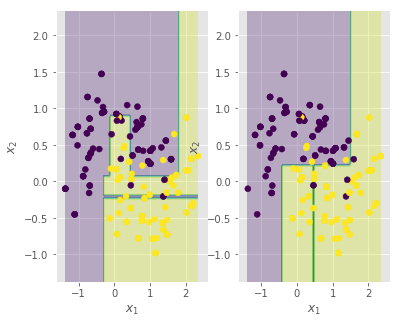

In [14]:
demo_2dec_tree()

Bagging - это параллельный способ построения ансамбля.<br/>
1. Обучающая выборка сэмплируется $k$ раз с помощью *bootstrap'a* (выборка с возвратом)
2. На каждом сэмпле обучается отдельная **базовая модель**
3. Ответы моделей усредняются (возможно с весом)
<center><img src='https://api.ning.com/files/PljwbnoaWerfeDW8ck54xrq1d3AVIf518M0tLFD08F0oFg76*kz1qP9-Ndi1qXF50EfGAFDvcHOILJgdHPBRZzUedJMQmYe-/Capture.PNG' width='750'></center>

*Вопрос: Какая доля объектов в среднем попадает в один bootstrap сэмпл?*

## Почему усреднение работает?

* Какая высота у Эйфелевой башни?

* Кто здесь леопард?
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img width=400 src='images/cat1.jpg'></th>
    <th class="tg-031e"><img width=500 src='images/cat2.jpg'></th>
  </tr>
</table>

In [15]:
from sklearn.ensemble import RandomForestClassifier

def rf_demo(n_est=5):
    rf = RandomForestClassifier(random_state=123, n_estimators=n_est)

    np.random.seed(0)
    
    X, y = make_moons(noise=0.3, random_state=123)
    rf.fit(X, y)
    
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    
    
    for tree in rf.estimators_:
        y_hat = tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1, xx2, y_hat, alpha=1.0/n_est)
    plt.scatter(X[:,0], X[:,1], c=y)
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.title('N estimators = %d' % n_est)
    plt.show()



Так же есть некоторые обобщения бэггинга:

* Метод случайных подпространств - на шаге 1. сэмплируются не только объекты, но и подпространство признаков
* Метод случайного леса - на каждом узле сэмплируется подпространство признаков

В данном случае, на каждом сэмпле базовой моделью является дерево решений.<br/>
Если вам нужно за минимальное время построить достаточно точную и устойчивую модель - это ваш вариант.

In [17]:
try:
    fig = interact(rf_demo, n_est=IntSlider(min=1, max=101, value=1, step=5))
except:
    print 'Что-то не так. Посмотрите на доску'

interactive(children=(IntSlider(value=1, description=u'n_est', max=101, min=1, step=5), Output()), _dom_classes=('widget-interact',))

## Полезные ссылки
* [Визуализация работы деревьев](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
* [Гайд про энтропию](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx)
* [Гайд про энтропию 2](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/)

# Доп. Материалы
* Mohammed J. Zaki. Data Mining and Analysis: Fundamental Concepts and Algorithms. Ch19
* Trevor Hastie, et al. The Elements of Statistical Learning. Ch9.2
* [Random Forests Home](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)

## Вопросы?

## Пожалуйста, оставьте отзыв о лекции